<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
tickers = ['SBIN.NS', 'TCS.NS', 'INFY.NS', 'BHEL.NS', 'CIPLA.NS', 'ITC.NS', '^NSEI']
stock_data = yf.download(tickers, start="2016-08-1", end="2023-11-1")

[*********************100%%**********************]  7 of 7 completed


In [ ]:
rf = 0.01307
daily_returns = stock_data['Adj Close'].pct_change().dropna()
rm = daily_returns['^NSEI'].mean() * 252


In [ ]:
cov = daily_returns.cov()
var = daily_returns['^NSEI'].var()
beta_tcs = cov.loc['TCS.NS', '^NSEI']/ var
beta_tcs


0.6659578409242459

In [ ]:
beta_CIPLA = cov.loc['CIPLA.NS', '^NSEI']/ var
beta_CIPLA

0.4692808494114923

In [ ]:
beta_SBIN = cov.loc['SBIN.NS', '^NSEI']/ var
beta_SBIN

In [ ]:
r_tcs = rf + (beta_tcs * (rm-rf))
print("Expected rate of return on TCS is: " + str(r_tcs))

Expected rate of return on TCS is: 0.0885062187181781


In [ ]:
beta = cov.loc['^NSEI']/ var
r_stocklist = rf + (beta * (rm-rf))
print(r_stocklist)

BHEL.NS     0.151397
CIPLA.NS    0.066228
INFY.NS     0.104531
ITC.NS      0.096435
SBIN.NS     0.159349
TCS.NS      0.088506
^NSEI       0.126345
Name: ^NSEI, dtype: float64


In [3]:
#implement the CAPM in Python
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

In [4]:
#Specify the risky asset, the benchmark, and the time horizon
RISKY_ASSET = "AMZN"
MARKET_BENCHMARK = "^GSPC"
START_DATE = "2016-01-01"
END_DATE = "2023-12-08"

In [5]:
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
start=START_DATE,
end=END_DATE)

[*********************100%%**********************]  2 of 2 completed


In [6]:
#Resample to monthly data and calculate the simple returns
X = (
df["Adj Close"]
.rename(columns={RISKY_ASSET: "asset",
MARKET_BENCHMARK: "market"})
.resample("M")
.last()
.pct_change()
.dropna()
)

In [7]:
#Calculate beta using the covariance approach
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance
print(beta)

1.2467301789059477


In [8]:
#These results indicate that the beta (denoted as the market here) is equal to 1.2, which means that
#Amazon’s returns are 20% more volatile than the market (proxied by S&P 500). Or in other words,
#Amazon’s (excess) return is expected to move 1.2 times the market (excess) return. The value of the
#intercept is relatively small and statistically insignificant at the 5% significance level.

In [9]:
#Prepare the input and estimate the CAPM as a linear regression
# separate target
y = X.pop("asset")
# add constant
X = sm.add_constant(X)
# define and fit the regression model
capm_model = sm.OLS(y, X).fit()
# print results
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     64.83
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.64e-12
Time:                        17:33:58   Log-Likelihood:                 120.05
No. Observations:                  95   AIC:                            -236.1
Df Residuals:                      93   BIC:                            -231.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.007      1.147      0.2

In [10]:
#Using data from Prof. Kenneth French’s website
#The market premium (rm - rf ) and the risk-free rate (approximated by the one-month Treasury Bill)
#can be downloaded from Professor Kenneth French’s website Using the 13-Week T-bill (Yahoo Finance ticker: ^IRX).

In [11]:
#Define the length of the period in days:
N_DAYS = 90

In [12]:
df_rf = yf.download("^IRX",
start=START_DATE,
end=END_DATE,
progress=False)

In [13]:
#Resample the data to monthly frequency (by taking the last value for each month):

In [14]:
rf = df_rf.resample("M").last().Close / 100

In [15]:
#Calculate the risk-free return (expressed as daily values) and convert the values to monthly

In [16]:
rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)
rf = (rf ** 30) - 1

<Axes: title={'center': 'Risk-free rate (13-Week Treasury Bill)'}, xlabel='Date'>

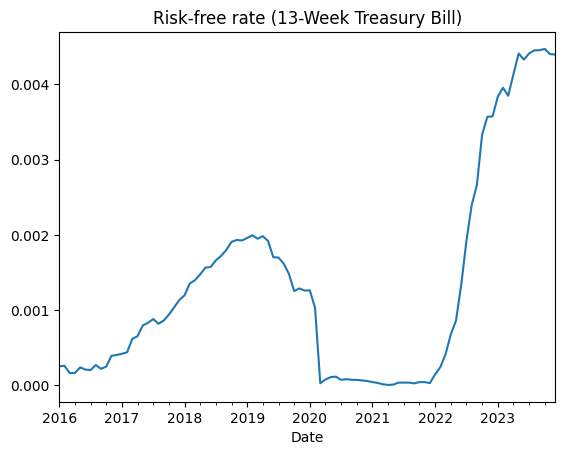

In [17]:
rf.plot(title="Risk-free rate (13-Week Treasury Bill)")

In [18]:
#Using the 3-Month T-bill from the FRED(Federal Reserve Economic Data) database
import pandas_datareader.data as web

In [19]:
rf = web.DataReader(
"TB3MS", "fred", start=START_DATE, end=END_DATE
)

In [20]:
rf = (1 + (rf / 100)) ** (1 / 12) - 1

<Axes: title={'center': 'Risk-free rate (3-Month Treasury Bill)'}, xlabel='DATE'>

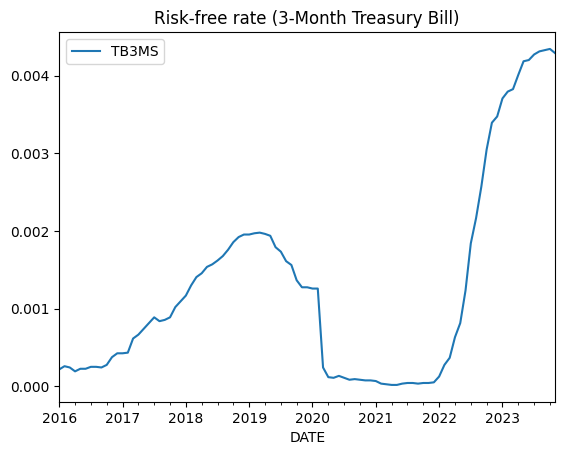

In [21]:
rf.plot(title="Risk-free rate (3-Month Treasury Bill)")